<h1><center> Symptoms based Disease Prediction</center></h1>

In [1]:
### import packages

## lets basic import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score

# from pandas_profiling import ProfileReport

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [2]:
## import data

df = pd.read_csv('./dataset.csv')
df = shuffle(df, random_state = 42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## remove ('_') underscore in the text

for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
    
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## charactieristics of data

df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Allergy,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [5]:
df['Disease'].unique()

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension ', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes ', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [7]:
mapper = {'Acne' : 'Dermatology', 'Hyperthyroidism' : 'ENT','AIDS' : 'Viral Infection',
         'Chronic cholestasis' : 'Gastroenterologists', 'Hypertension' : 'Cardiologist',
         'Hypoglycemia' : 'Diabetologist', 'Arthritis' : 'rheumatologist',
          'Hepatitis B' : 'Hepatologist', 'Migraine' : 'Neurologisit', 
          'Urinary tract infection' : 'urologist','Diabetes' : 'Diabetologist',
          'Hepatitis D' : 'Hepatologist' , 'Psoriasis' : 'Hepatologist' ,
          'Alcoholic hepatitis' : 'Hepatologist', 'Dimorphic hemmorhoids(piles)' : 'Diabetologist',
          'Hepatitis E' : 'Hepatologist', 'Cervical spondylosis' : 'Cardiologist',
          'Bronchial Asthma' : 'Pulmonologist', 'hepatitis A' : 'Hepatologist', 
          'Allergy' : 'Allergist', 'Hepatitis C' : 'Hepatologist', 
          'Pneumonia' : 'Pulmonologist', 'Hypothyroidism' : 'ENT',
          'Gastroenteritis' : 'Hepatologist', 'Varicose veins' : 'Neurologist',
          'Jaundice' : 'Hepatologist', 'Drug Reaction' : 'Hepatologist',
          '(vertigo) Paroymsal  Positional Vertigo' : 'Neurologist',
          'Heart attack' : 'Cardiologist','Tuberculosis' : 'Hepatologist',
          'Typhoid' : 'Bacteriologist', 'Common Cold' : 'Viralologist',
          'Peptic ulcer diseae' : 'Dermatologist',
          'Paralysis (brain hemorrhage)' : 'Neurologist',
          'Fungal infection' : 'Bacterilogist', 'Impetigo' :'Viralologist',
          'GERD' : 'Cardiologist', 'Dengue' : 'Viralologist', 
          'Malaria' : 'Viralologist', 'Chicken pox' : 'Viralologist',
          'Osteoarthristis' : 'Dermatologist'
         }

In [9]:
for index,row in df.iterrows() :
    try :
        sec = mapper[row['Disease']]
        row['Disease'] = sec
    except :
        continue

In [10]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Dermatology,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Dermatology,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,ENT,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,Viral Infection,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Gastroenterologists,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,Hepatologist,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,Dermatologist,vomiting,indigestion,loss of appetite,abdominal pain,internal itching,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3092,Viralologist,skin rash,chills,joint pain,vomiting,fatigue,high fever,headache,nausea,loss of appetite,pain behind the eyes,back pain,malaise,muscle pain,red spots over body,NaN,NaN,NaN
3772,Bacterilogist,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
## check null values

null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


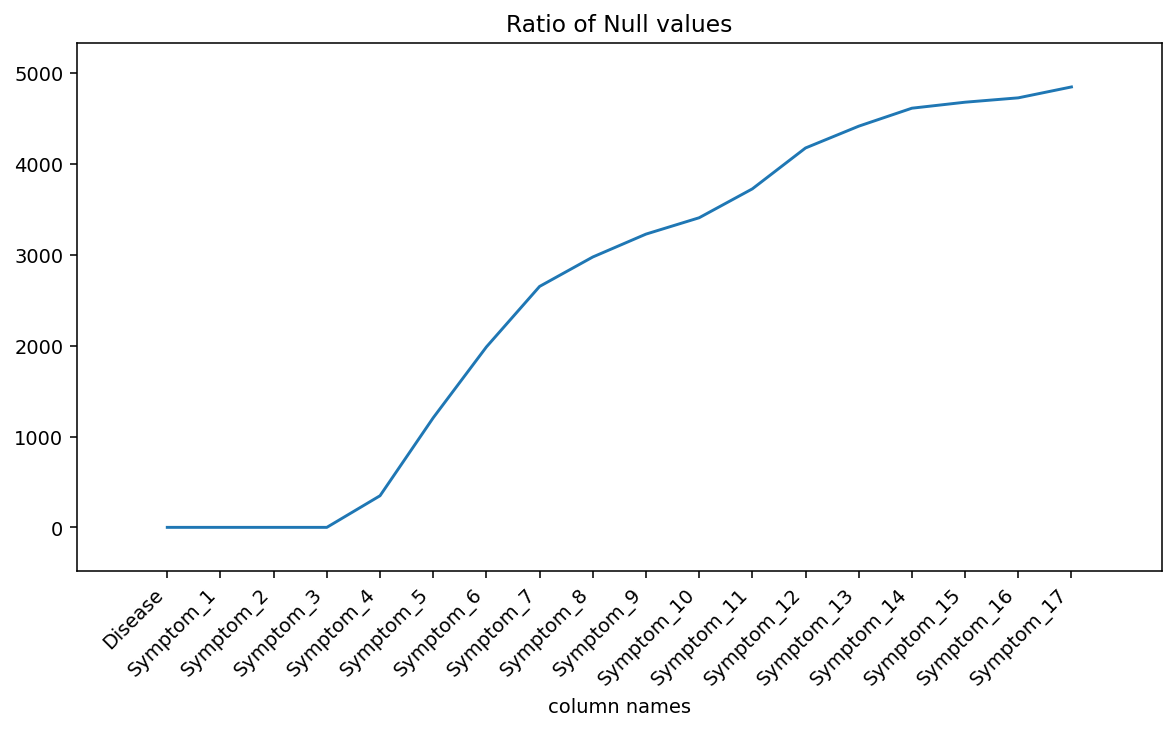

In [12]:
## plot of null value

plt.figure(figsize=(10, 5), dpi=140)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [13]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Dermatology,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dermatology,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENT,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,Viral Infection,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gastroenterologists,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## lets fill nan values

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Dermatology,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Dermatology,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ENT,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,Viral Infection,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Gastroenterologists,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [15]:
print(df.values)

[['Dermatology' 'skin rash' 'blackheads' ... 0 0 0]
 ['Dermatology' 'skin rash' 'pus filled pimples' ... 0 0 0]
 ['ENT' 'fatigue' 'mood swings' ... 0 0 0]
 ...
 ['Viralologist' 'skin rash' 'chills' ... 0 0 0]
 ['Bacterilogist' 'itching' 'skin rash' ... 0 0 0]
 ['Hepatologist' 'itching' 'skin rash' ... 0 0 0]]


In [16]:
## lets explore symptom severity

df_severity = pd.read_csv('./Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head(10)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [17]:
## overall list

df_severity['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [18]:
## lets encode sysptoms in the data

vals = df.values
symptoms = df_severity['Symptom'].unique()


for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]

In [19]:
df_processed = pd.DataFrame(vals, columns=cols)
df_processed.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Dermatology,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Dermatology,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ENT,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,Viral Infection,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Gastroenterologists,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


In [20]:
## assign symptoms with no rank to zero

df_processed = df_processed.replace('dischromic  patches', 0)
df_processed = df_processed.replace('spotting  urination', 0)
df_processed = df_processed.replace('foul smell of urine', 0)

In [21]:
## split data

data = df_processed.iloc[:,1:].values
labels = df['Disease'].values

In [22]:
## split trai and test data

# help(train_test_split)

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [23]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3936, 17) (3936,) (984, 17) (984,)


In [24]:
## shape of train data

print(X_train[0])
print(X_train[1])

[6 4 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 5 3 5 4 4 3 2 3 0 0 0 0 0 0 0 0]


### performance evaluation

- Accuracy

    Accuracy is one of classification metrics, which is ratio of number of correct predictions to the total number of input samples. <br>
    
- Precision

    It is the number of correct positive results divided by the number of positive results predicted by the classifier.<br>
    
- Recall

    It is the number of correct positive results divided by the number of all relevant samples.<br>
    
- F1 score

    F1 Score is the Harmonic Mean between precision and recall.<br>

In [25]:
def performance_evaluator(model, X_test, y_test):
    """
    model: Load the trained model
    X_test: test data
    y_test: Actual value
    
    """
    
    y_predicted = model.predict(X_test)
    
    precision = precision_score(y_test, y_predicted,average='micro')*100
    
    accuracy = accuracy_score(y_test, y_predicted)*100
    
    f1 = f1_score(y_test, y_predicted, average='macro')*100
    
    recall = recall_score(y_test, y_predicted, average='macro')*100
    
    print('precision----->', precision) 
    print('\n************************')
    print('Accuracy----->', accuracy)
    print('\n************************')
    print('F1 Score----->', f1)
    print('\n************************')
    print('Recall----->', recall)
    print('\n************************')
    return accuracy, precision, f1, recall

In [26]:
## plot classification metrix 

def confusion_plot(model, X_test, y_test):
    """
    to plot confusion metrix
    """
    plt.figure(figsize=(10, 10), dpi=150)
    
    y_pred = model.predict(X_test)
    con_me = confusion_matrix(y_test, y_pred)
    sns.heatmap(con_me, annot=True)

## Machine learning algorithm

- Set of rules to achieve some outcome
- Uses data to learn the data can be any data type.
- 4 Type(Supervised, unsupervised, reinforcement, semi-supervised learning)


supervised learning.
- It has target and features
- It has two type-> classification and Regression.
    
Unsupervised learning 
- It has only target values.
- Clustering. 
Reinforcement Learning

### Support vector machine

- Machine learning algorithm
- Supervised learning
- Classifcation and Regression
- it creates the best decision bountry that can segregate n-dimentional space into classes so that we can easily put new data points in the correct category- Hyperplane. 
- Out of the box classifier.
- a point is a hyperplane in 1-dimensional space.
- a line is a hyperplane in 2-dimentional space
- a plane is a hyperplane in 3-dementional space.
- each and every inditial points are called as vectors
- the data/vector points closest to the hyperplane are known as support vector.

- the dimention of the hyperplane is depenfing on number of features
- If number of fearures is 2 than the hyper plane is just a line. 
- If number of features is 3 that the hyperplane is just a plane.
- Distance between vectors and hyoerplane is called margin. 

In [27]:
## lets play with Support Vector Machine

SVM_init = SVC()
model_SVM_init = SVM_init.fit(X_train, y_train)

In [28]:
_1, _2, _3, _4 = performance_evaluator(model_SVM_init, X_test, y_test)

precision-----> 92.58130081300813

************************
Accuracy-----> 92.58130081300813

************************
F1 Score-----> 92.20305604935447

************************
Recall-----> 92.54315344472562

************************


In [29]:
## support Vector machine Hyperparameter tuned

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.5s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.1s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [30]:
## best estimator

print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=1, gamma=1)
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [31]:
## lets built based SVC model.

hyper_tuned_svc = SVC(C= 10, gamma= 0.1, kernel= 'rbf')
hyper_tuned_svc.fit(X_train, y_train)

## lets calculate performance
_1, _2, _3, _4 = performance_evaluator(hyper_tuned_svc, X_test, y_test)

precision-----> 99.59349593495935

************************
Accuracy-----> 99.59349593495935

************************
F1 Score-----> 99.42452790460592

************************
Recall-----> 99.53323848968132

************************


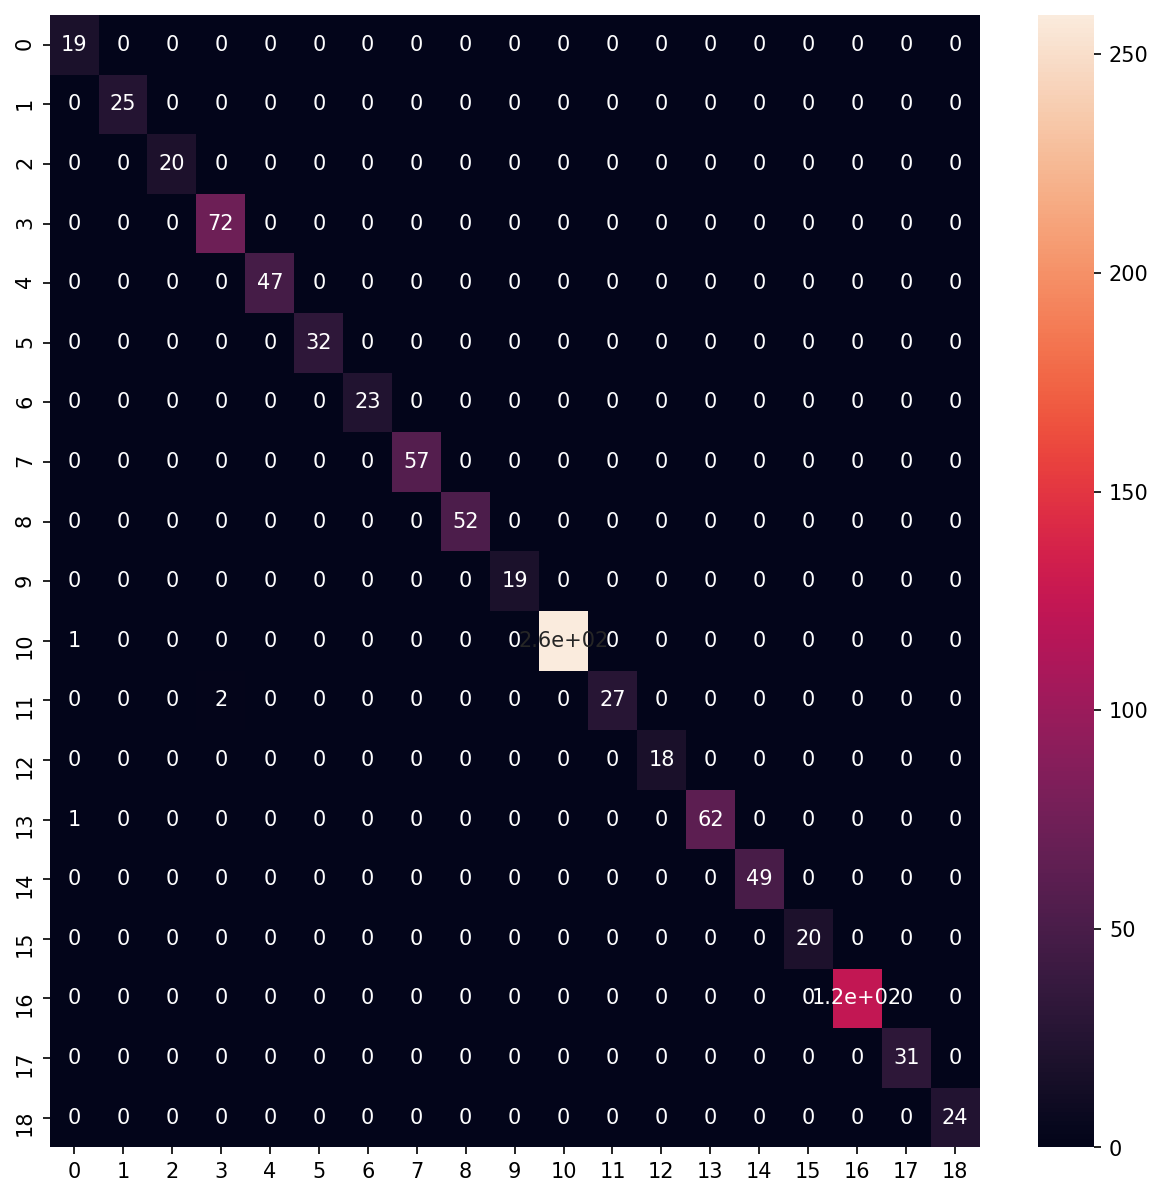

In [32]:
confusion_plot(hyper_tuned_svc, X_test, y_test)

### GradientBoostingClassifier

In [33]:
## Gradient Boosting Classifier with out hyperparameter tuning
 
GBC_model = GradientBoostingClassifier()
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [34]:
## lets calculate performance Gradient Boosting Classifier

_1, _2, _3, _4 = performance_evaluator(GBC_model, X_test, y_test)

precision-----> 99.59349593495935

************************
Accuracy-----> 99.59349593495935

************************
F1 Score-----> 99.42452790460592

************************
Recall-----> 99.53323848968132

************************


In [35]:
# SAVING THE GBC MODEL
import pickle
with open('gbm_model.pkl', 'wb') as f:
    pickle.dump(GBC_model, f)


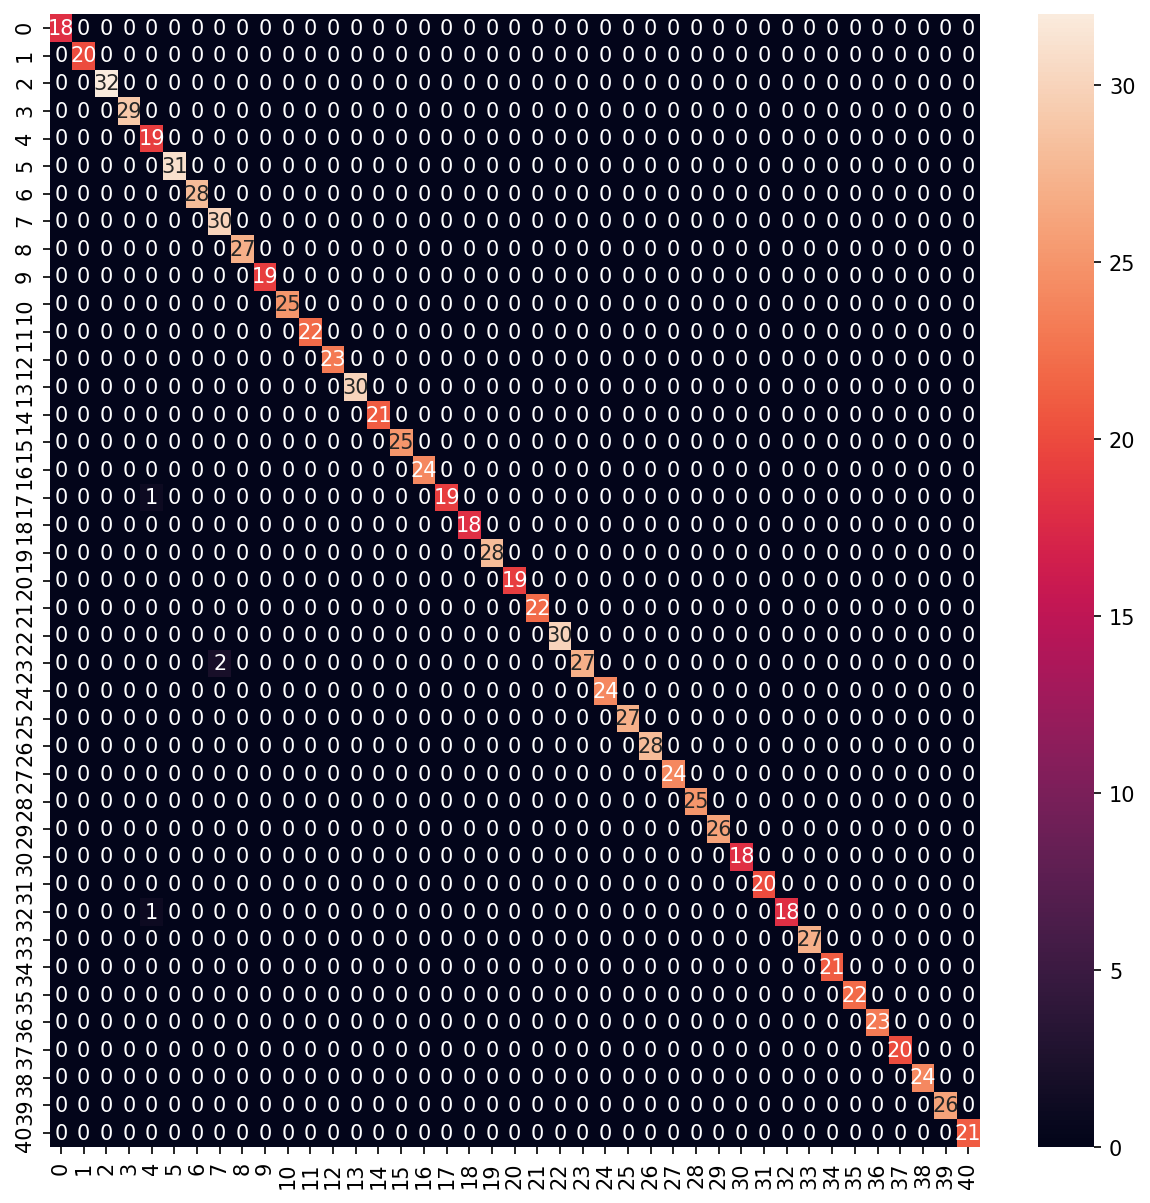

In [28]:
confusion_plot(GBC_model, X_test, y_test)

In [29]:
## some meaningfull predictions

GBC_model.predict([X_test[1]])

array(['Peptic ulcer diseae'], dtype=object)

In [30]:
GBC_model.predict([X_test[2]])

array(['Fungal infection'], dtype=object)

In [31]:
GBC_model.predict([X_test[3]])

array(['Hypoglycemia'], dtype=object)

In [37]:
# saving the symptoms
## overall list

sym_list = df_severity['Symptom'].unique()
data = {'symptoms' : sym_list}
import pandas as pd
df = pd.DataFrame(data)
df.to_csv('./symptoms_list.csv', index = False)

In [38]:
len(symptoms)

132

<h1><center>The END</center></h1>